In [61]:
pip install xlswriter

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement xlswriter (from versions: none)
ERROR: No matching distribution found for xlswriter
You should consider upgrading via the 'e:\Disaster_Management\venv\Scripts\python.exe -m pip install --upgrade pip' command.


In [62]:
pip install datetime

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'e:\Disaster_Management\venv\Scripts\python.exe -m pip install --upgrade pip' command.


In [63]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'e:\Disaster_Management\venv\Scripts\python.exe -m pip install --upgrade pip' command.


In [64]:
pip install bz2file

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'e:\Disaster_Management\venv\Scripts\python.exe -m pip install --upgrade pip' command.


In [65]:
import datetime as dt
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report
from sklearn.ensemble import RandomForestRegressor

In [66]:
disaster = pd.read_csv('fire_archive.csv')

In [67]:
disaster.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type
0,-11.8070,142.0583,313.0,1.0,1.0,2019-08-01,56,Terra,MODIS,48,6.3,297.3,6.6,D,0
1,-11.7924,142.0850,319.3,1.0,1.0,2019-08-01,56,Terra,MODIS,71,6.3,297.3,11.3,D,0
2,-12.8398,132.8744,311.6,3.1,1.7,2019-08-01,57,Terra,MODIS,42,6.3,298.7,23.1,D,0
3,-14.4306,143.3035,310.1,1.1,1.1,2019-08-01,57,Terra,MODIS,33,6.3,296.1,6.5,D,0
4,-12.4953,131.4897,310.3,4.0,1.9,2019-08-01,57,Terra,MODIS,36,6.3,298.8,27.6,D,0


In [68]:
disaster.shape

(36011, 15)

In [69]:
print(disaster.columns)
print(disaster.dtypes)

Index(['latitude', 'longitude', 'brightness', 'scan', 'track', 'acq_date',
       'acq_time', 'satellite', 'instrument', 'confidence', 'version',
       'bright_t31', 'frp', 'daynight', 'type'],
      dtype='object')
latitude      float64
longitude     float64
brightness    float64
scan          float64
track         float64
acq_date       object
acq_time        int64
satellite      object
instrument     object
confidence      int64
version       float64
bright_t31    float64
frp           float64
daynight       object
type            int64
dtype: object


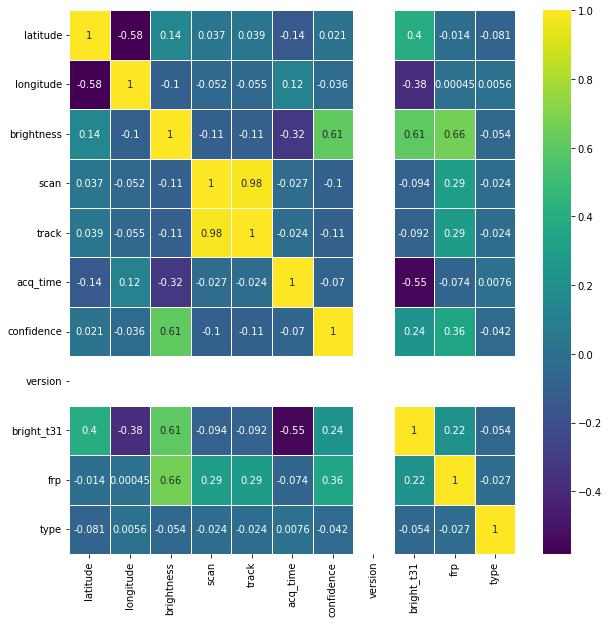

In [70]:
plt.figure(figsize=(10, 10))
sns.heatmap(disaster.corr(),annot=True,cmap='viridis',linewidths=.5)
plt.show()

In [71]:
disaster = disaster.drop(['track'], axis = 1)

In [72]:
disaster = disaster.drop(['instrument', 'version'], axis = 1)

In [73]:
disaster.satellite.unique()

array(['Terra', 'Aqua'], dtype=object)

In [74]:
# mapping daynight data and the satellite data to the integers

In [75]:

daynight_map = {"D": 1, "N": 0}
satellite_map = {"Terra": 1, "Aqua": 0}

disaster['daynight'] = disaster['daynight'].map(daynight_map)
disaster['satellite'] = disaster['satellite'].map(satellite_map)
disaster.dtypes


latitude      float64
longitude     float64
brightness    float64
scan          float64
acq_date       object
acq_time        int64
satellite       int64
confidence      int64
bright_t31    float64
frp           float64
daynight        int64
type            int64
dtype: object

In [76]:
#Since we observe that there are ony 2 satellites used, so we encode them as binary numbers 1 & 0

In [77]:
disaster['type'].value_counts()
#disaster.type.unique()

0    35666
2      335
3       10
Name: type, dtype: int64

In [78]:
dummy_type = pd.get_dummies(disaster['type'])
disaster = pd.concat([disaster, dummy_type], axis=1)
disaster

,latitude,longitude,brightness,scan,acq_date,acq_time,satellite,confidence,bright_t31,frp,daynight,type,0,2,3
0,-11.8070,142.0583,313.0,1.0,2019-08-01,56,1,48,297.3,6.6,1,0,1,0,0
1,-11.7924,142.0850,319.3,1.0,2019-08-01,56,1,71,297.3,11.3,1,0,1,0,0
2,-12.8398,132.8744,311.6,3.1,2019-08-01,57,1,42,298.7,23.1,1,0,1,0,0
3,-14.4306,143.3035,310.1,1.1,2019-08-01,57,1,33,296.1,6.5,1,0,1,0,0
4,-12.4953,131.4897,310.3,4.0,2019-08-01,57,1,36,298.8,27.6,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36006,-28.0656,131.6334,312.7,1.2,2019-09-30,1644,0,85,292.9,14.2,0,0,1,0,0
36007,-28.2625,128.5494,304.9,1.0,2019-09-30,1644,0,27,290.9,6.4,0,0,1,0,0
36008,-28.2941,128.5123,301.7,1.0,2019-09-30,1644,0,43,290.4,5.5,0,0,1,0,0
36009,-28.3001,128.5530,303.6,1.0,2019-09-30,1644,0,41,290.3,5.7,0,0,1,0,0


In [79]:
disaster = disaster.drop(['type'], axis = 1)
disaster.head()


,latitude,longitude,brightness,scan,acq_date,acq_time,satellite,confidence,bright_t31,frp,daynight,0,2,3
0,-11.8070,142.0583,313.0,1.0,2019-08-01,56,1,48,297.3,6.6,1,1,0,0
1,-11.7924,142.0850,319.3,1.0,2019-08-01,56,1,71,297.3,11.3,1,1,0,0
2,-12.8398,132.8744,311.6,3.1,2019-08-01,57,1,42,298.7,23.1,1,1,0,0
3,-14.4306,143.3035,310.1,1.1,2019-08-01,57,1,33,296.1,6.5,1,1,0,0
4,-12.4953,131.4897,310.3,4.0,2019-08-01,57,1,36,298.8,27.6,1,1,0,0


In [80]:
# TYPES ARE THE SCALE OF THE FIRES IN THAT REGION

In [81]:
disaster = disaster.rename(columns = {0:'Type_0',2:'Type_2',3:'Type_3'})
disaster

,latitude,longitude,brightness,scan,acq_date,acq_time,satellite,confidence,bright_t31,frp,daynight,Type_0,Type_2,Type_3
0,-11.8070,142.0583,313.0,1.0,2019-08-01,56,1,48,297.3,6.6,1,1,0,0
1,-11.7924,142.0850,319.3,1.0,2019-08-01,56,1,71,297.3,11.3,1,1,0,0
2,-12.8398,132.8744,311.6,3.1,2019-08-01,57,1,42,298.7,23.1,1,1,0,0
3,-14.4306,143.3035,310.1,1.1,2019-08-01,57,1,33,296.1,6.5,1,1,0,0
4,-12.4953,131.4897,310.3,4.0,2019-08-01,57,1,36,298.8,27.6,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36006,-28.0656,131.6334,312.7,1.2,2019-09-30,1644,0,85,292.9,14.2,0,1,0,0
36007,-28.2625,128.5494,304.9,1.0,2019-09-30,1644,0,27,290.9,6.4,0,1,0,0
36008,-28.2941,128.5123,301.7,1.0,2019-09-30,1644,0,43,290.4,5.5,0,1,0,0
36009,-28.3001,128.5530,303.6,1.0,2019-09-30,1644,0,41,290.3,5.7,0,1,0,0


In [82]:
bins = [0, 1, 2, 3, 4, 5]
labels = [1,2,3,4,5]
disaster['scan_binned'] = pd.cut(disaster['scan'], bins=bins, labels=labels)
disaster

,latitude,longitude,brightness,scan,acq_date,acq_time,satellite,confidence,bright_t31,frp,daynight,Type_0,Type_2,Type_3,scan_binned
0,-11.8070,142.0583,313.0,1.0,2019-08-01,56,1,48,297.3,6.6,1,1,0,0,1
1,-11.7924,142.0850,319.3,1.0,2019-08-01,56,1,71,297.3,11.3,1,1,0,0,1
2,-12.8398,132.8744,311.6,3.1,2019-08-01,57,1,42,298.7,23.1,1,1,0,0,4
3,-14.4306,143.3035,310.1,1.1,2019-08-01,57,1,33,296.1,6.5,1,1,0,0,2
4,-12.4953,131.4897,310.3,4.0,2019-08-01,57,1,36,298.8,27.6,1,1,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36006,-28.0656,131.6334,312.7,1.2,2019-09-30,1644,0,85,292.9,14.2,0,1,0,0,2
36007,-28.2625,128.5494,304.9,1.0,2019-09-30,1644,0,27,290.9,6.4,0,1,0,0,1
36008,-28.2941,128.5123,301.7,1.0,2019-09-30,1644,0,43,290.4,5.5,0,1,0,0,1
36009,-28.3001,128.5530,303.6,1.0,2019-09-30,1644,0,41,290.3,5.7,0,1,0,0,1


In [83]:
disaster
disaster['acq_date'] = pd.to_datetime(disaster['acq_date'])
disaster.dtypes

latitude              float64
longitude             float64
brightness            float64
scan                  float64
acq_date       datetime64[ns]
acq_time                int64
satellite               int64
confidence              int64
bright_t31            float64
frp                   float64
daynight                int64
Type_0                  uint8
Type_2                  uint8
Type_3                  uint8
scan_binned          category
dtype: object

In [84]:
disaster = disaster[disaster.columns.drop('scan')]

In [85]:
#We seprate the years, months and the date seprately

In [86]:
disaster['year'] = disaster['acq_date'].dt.year
disaster['month'] = disaster['acq_date'].dt.month
disaster['date'] = disaster['acq_date'].dt.day
disaster

,latitude,longitude,brightness,acq_date,acq_time,satellite,confidence,bright_t31,frp,daynight,Type_0,Type_2,Type_3,scan_binned,year,month,date
0,-11.8070,142.0583,313.0,2019-08-01,56,1,48,297.3,6.6,1,1,0,0,1,2019,8,1
1,-11.7924,142.0850,319.3,2019-08-01,56,1,71,297.3,11.3,1,1,0,0,1,2019,8,1
2,-12.8398,132.8744,311.6,2019-08-01,57,1,42,298.7,23.1,1,1,0,0,4,2019,8,1
3,-14.4306,143.3035,310.1,2019-08-01,57,1,33,296.1,6.5,1,1,0,0,2,2019,8,1
4,-12.4953,131.4897,310.3,2019-08-01,57,1,36,298.8,27.6,1,1,0,0,4,2019,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36006,-28.0656,131.6334,312.7,2019-09-30,1644,0,85,292.9,14.2,0,1,0,0,2,2019,9,30
36007,-28.2625,128.5494,304.9,2019-09-30,1644,0,27,290.9,6.4,0,1,0,0,1,2019,9,30
36008,-28.2941,128.5123,301.7,2019-09-30,1644,0,43,290.4,5.5,0,1,0,0,1,2019,9,30
36009,-28.3001,128.5530,303.6,2019-09-30,1644,0,41,290.3,5.7,0,1,0,0,1,2019,9,30


In [87]:
disaster.shape

(36011, 17)

In [88]:
y=disaster['confidence']

In [89]:
fin = disaster.drop(['confidence', 'acq_date', 'acq_time', 'bright_t31', 'Type_0'], axis = 1)
fin

,latitude,longitude,brightness,satellite,frp,daynight,Type_2,Type_3,scan_binned,year,month,date
0,-11.8070,142.0583,313.0,1,6.6,1,0,0,1,2019,8,1
1,-11.7924,142.0850,319.3,1,11.3,1,0,0,1,2019,8,1
2,-12.8398,132.8744,311.6,1,23.1,1,0,0,4,2019,8,1
3,-14.4306,143.3035,310.1,1,6.5,1,0,0,2,2019,8,1
4,-12.4953,131.4897,310.3,1,27.6,1,0,0,4,2019,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...
36006,-28.0656,131.6334,312.7,0,14.2,0,0,0,2,2019,9,30
36007,-28.2625,128.5494,304.9,0,6.4,0,0,0,1,2019,9,30
36008,-28.2941,128.5123,301.7,0,5.5,0,0,0,1,2019,9,30
36009,-28.3001,128.5530,303.6,0,5.7,0,0,0,1,2019,9,30


In [92]:
fin.to_excel(r'E:\Disaster_Management\Temp_models\Fire_cleaned.xlsx', index = False)